# Exercises 09

## Exercises 09.1
The exercise consist of running a Genetic algorithm in order to numerically solve the Travelling Salesman problem. There are some ground rules that have been set: each path has to start from city n. 1, and the salesman has to visit each city without any repetition, and end at the starting city, so the path is closed.

#### Coding choices
I had to face a lot of coding choices to make the genetic algorithm run as wanted:
1. Objects: using C++, object oriented programming is a natural part of the language, in this case I decided to create an object called $City$, characterized by 3 private members (label, x coordinate, and y coordinate), in order to store the cities I created a C dynamic array, because number of cities per simulation could have been variable;

2. Division of generation and genetic algorithm run: I decide to split the generation feature and the algorithm run, in favor of reducing the correlation between the two aspects by changing the seed for the generation and the simulation;

3. Vector (Standard Library): using the features natively provided by the C++ has been quite an easy choice, I chose to represent the paths as vectors of integers, and so I've defined the population as vector of vectors of integers, keeping separate the cities and the evolution of the population, the only point of contact is, obviously, in the estiamtion of the path length, because in order to estimate the distance between the cities I used the indeces presents in the vectors representing the path to call coordinates of the cities stored in the City-array;

4. Order, Check, and Selection:
    * Order: it is a fundamental function for the code, indeed it allows to order the population of paths using the selected criterium (I chose the incresing path length). Using vectors as containers for paths and vector of vectors as populatio, has been easy to sort the population using the **sort** function present in the **algorithm** library present in the C++ Standard Library,
    * Check: very useful to test each mutation or crossing over function, it consist of checking whether the first element of the path is city n. 1 and if any element appears more than once,
    * Selection: it allows to select the two chromosomes to cross over, I chose to follow the suggested hint: $index = \lfloor N \cdot r^{\alpha} \rfloor$, where $N$ is the number of cities, $r$ is a uniformly randomly generated number in $[0, 1)$, and $\alpha$ is a proper exponent, I chose $\alpha$ = 2. I put a control in the function because 0 is the most probable outcome, so many times the crossing over would have been between the first element of the population and itself, not giving any ergodicity to the algorithm, so the second index is generated until it is different from the first one;
    
5. Output on file:
    * Cities: the cities, once generated, have been printed onto a file called *cities.dat*, each line contains the label, the x coordinate, and the y coordinate,
    * Best Path Length: the best path length in function of the number of steps has been printed on a file called *output_best.dat*, each line contains the number of the step and the length of the best path,
    * Best Half Mean Path Lenght: the mean of the path length of the best half of the population in function of the number of steps has been printed on a file called *output_mean.dat*, each line contains the number of the step and the mean length of the best half of the population,
    * Best Path: the best path is stored in a file called *output_bestPath.dat*, the first line is the title and contains the length of the path, the next lines contains the indeces of the 34 cities in the right order.

#### Metric
I decided to use the $L^{(1)}$ to calculate the distance between the cities that the salesman is going to visit because it allows to easily compare the result obtained in the first part of the exercise (involving 34 cities randomly distributed on a circle of radius r = 1) with the correct solution, indeed the best path in this case is, once chosen if clockwise or anticlockwise, the one which visits the consecutive cities. So it has been quite easy to test the code, moreover the uniform distribution of the cities on a circle gives that the circumfernace (C = $2\pi \approx$ 6.2832) is an upper boundary for the length of the path.

#### Genetic algorithm: Mutations and Crossing Over
I decided to implement all the suggested mutations and give them the same probability to occur (10 %), moreover the mutations can affect just the best half of the population, in order to introduce some kind of elitism:
1. Pair permutation: consists of changing the order in which the salesman visits the cities. This mutation does not need any check if coded properly, obviously the cities has to be chosen among n. 2 and n. 34;
2. Cluster permutation: consists of permutating two clusters of cities in a path. Again, this mutation does not need any check if coded well, the cluster has to be of length $l < N/2$, where $N$ is the number of the cities, strictly minor because the city n. 1 has to be excluded;
3. Reverse: consists of reversing a cluster of cities, always remembering not to select city n. 1;
4. Queue: consists of selecting a cluster of cities, and put them at the end of the path, this mutation does not need any check, again, it shoulb be kept in mind not to select city n.1, which always has to remain in its position.

The hardest part has been implementing the Crossing Over between to chromosomes (with 80% of occurance probability), infact I needed to take into account the ground rules exposed above. The check function is very useful to determine whether the result of a crossing over is good or not, after testing the Crossing Over function I decided to remove Check call, in order to speed up the code. In nature, Crossing Over consist of selecting a crossing spot, cut the two chromosome, and the replace the cutted parts with one another's, in this case that's not viable, because there's no place for repetition in chromosomes, so it's fundamental to look for the cities of the second part of the second chromosome that exist in the first part of the first chromosome, and vice versa. These elements have been kept in memory using a vector and attached to the crossed over chromosome, in order to be sure of visiting all the cities once. The main purpose of crossing over, as every mutation, is increase ergodicity, exploring the most different configuration in order to reach the "best" one, what makes a configuration better than one another is the order in which cities are visited, so the crossing over applied to this case of study is focussed on exchanging the order in which cities appear between paths.

#### Steady state
The code has been developed following the paradigm of a **Steady-state Genetic Algorithm**, instead of a **Classic Genetic Algorithm**, the difference between these two methods consist of not replacing all the initial population with another one generated starting from the first one (**Classic GA**), but replacing just the two worst fitting elements of the population with the crossed over chromosomes, this paradigm allows to reach fine result just after $\sim 10^4$ steps, in the cases exposed below, the numbers of steps are both $2 \cdot 10^4$, and the results are astonishing. Note: with a population of 100 chromosomes and 20000 steps, the execution time of the code is 10 $\div$ 20 seconds.

#### Conclusions
Nature gives us, probably, the best optimization algorithm, fixed environment coditions, genetic mutation and crossing over during coupling, made natural selection act on species in order to select the best individuals, that could prevale on other members of the species or on other species in general, or just best fit the given conditions. Then, computers allow us to implement the evolution of population and increase the speed of this mechanisms, make it compatible with the time scales our lives, and solve our optimization problems.

## Cities distributed on a unitarian circle

The two plots below show the trends of the length of the best path in the population and the mean of the length of the paths which live in the best half of the population. The first one shows that the optimization algorithm soon reaches a good result, but many more steps are necessary to gain the best result, in this case the term *best* isn't an approximation, indeed it is the true best path, as already exposed above, in the **Metric** dissertation. Similarly, the mean of the path length of the best half of the population reaches relatively quickly a small value, then it flattens at the same time of the lenght of the best path, obviously it shows some fluctuations.

Length of the best element of the population:
L = 6.23877


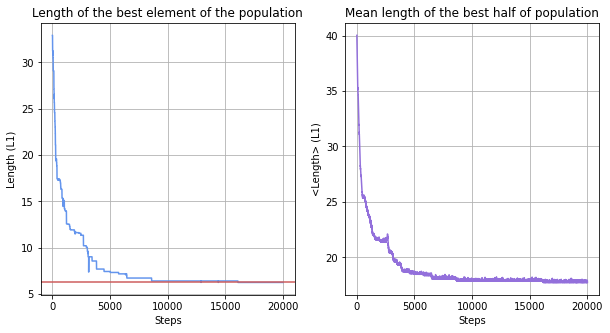

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

# simulation parameters
ncities = 34
nsteps  = 20000
fig = plt.figure(1, figsize=[10, 5])
# data loading
steps = np.loadtxt("./dataEx1/circle/output_best.dat", usecols = 0)
pathLeng = np.loadtxt("./dataEx1/circle/output_best.dat", usecols = 1)
pathMean = np.loadtxt("./dataEx1/circle/output_mean.dat", usecols = 1)
# Length of the best element of the population
print("Length of the best element of the population:")
print("L =", pathLeng[nsteps - 1])
fig.add_subplot(121)
plt.plot(steps, pathLeng, color="cornflowerblue")
plt.axhline(y=pathLeng[nsteps - 1], color="indianred")
plt.title("Length of the best element of the population")
plt.xlabel("Steps")
plt.ylabel("Length (L1)")
plt.grid()
# Mean length of the best half of population
fig.add_subplot(122)
plt.plot(steps, pathMean, color="mediumpurple")
plt.title("Mean length of the best half of population")
plt.xlabel("Steps")
plt.ylabel("<Length> (L1)")
plt.grid()
# plot
plt.show()

The plot below shows the best path of the salesman, as exposed in the **Metric** paragraph, the best path is the one which follows the order of the cities, clockwise or anticlockwise, on the circle, and the circumferance is an upper boundary for the best path length. Note: the path is travelled anticlockwise.

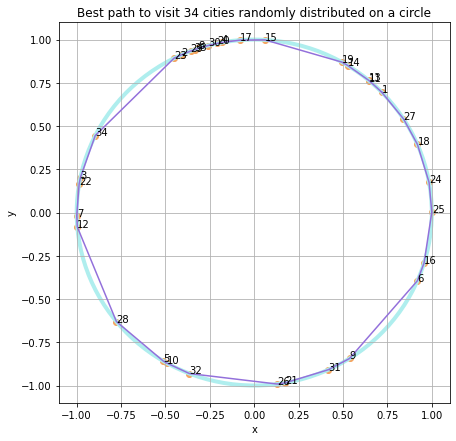

In [2]:
fig = plt.figure(1, figsize=[7, 7])
# data loading
bestPathLabel = np.loadtxt("./dataEx1/circle/output_bestPath.dat", skiprows=1)
# print(bestPathLabel)
citiesL = np.loadtxt("./dataEx1/circle/cities.dat", usecols = 0)
citiesX = np.loadtxt("./dataEx1/circle/cities.dat", usecols = 1)
citiesY = np.loadtxt("./dataEx1/circle/cities.dat", usecols = 2)
# preparing array for plotting
bestPathX = np.zeros(ncities + 1)
bestPathY = np.zeros(ncities + 1)
for ic in range(ncities):
    bestPathX[ic] = citiesX[int(bestPathLabel[ic]) - 1]
    bestPathY[ic] = citiesY[int(bestPathLabel[ic]) - 1]
bestPathX[ncities] = citiesX[0]
bestPathY[ncities] = citiesY[0]

# unitarian circle
plt.gca().add_patch(Circle((0.,0.), 1., edgecolor="paleturquoise", facecolor='none', lw=4))
# plot
plt.plot(bestPathX, bestPathY, color="mediumpurple")
plt.scatter(citiesX, citiesY, color="sandybrown")
for i in range(ncities):
    plt.text(citiesX[i], citiesY[i], str(i+1))
plt.title("Best path to visit " + str(ncities) + " cities randomly distributed on a circle")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

## Cities distributed inside a square ($L$ = 2, centered in $(0,0)$)

The two plots below show the same trends of the other case. The first plot shows that the genetic algorithm reaches a result quite quickly, but, in this case, the term *best* can't be used with any certainty, indeed we can't know if it is the true best path, some criteria to determine whether the result is good enough could be running a different type of simulation, such as the **simulated annealing**, exploiting the *Metropolis* algorithm, and comparing the results, or using a different seed for the pseudo-random number generator, or noting if the path doesn't show any cross, and assume this feature as a sanity parameter. Similarly to the first case, the mean of the path length of the best half of the population reaches a small value, then it flattens at the same time of the lenght of the best path, obviously it shows some fluctuations, as espected.

Length of the best element of the population:
L = 9.58133


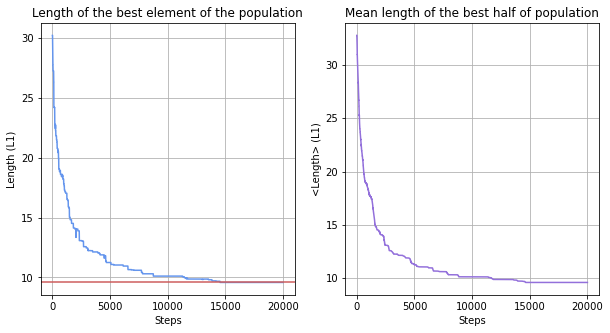

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

# seed 42, population of 100
# simulation parameter
nsteps = 20000
ncities = 34
# figure setup
fig = plt.figure(figsize=[10, 5])
# data loading
steps = np.loadtxt("./dataEx1/square/output_best.dat", usecols = 0)
pathLeng = np.loadtxt("./dataEx1/square/output_best.dat", usecols = 1)
pathMean = np.loadtxt("./dataEx1/square/output_mean.dat", usecols = 1)
# Length of the best element of the population
print("Length of the best element of the population:")
print("L =", pathLeng[nsteps - 1])
fig.add_subplot(121)
plt.plot(steps, pathLeng, color="cornflowerblue")
plt.axhline(y=pathLeng[nsteps - 1], color="indianred")
plt.title("Length of the best element of the population")
plt.xlabel("Steps")
plt.ylabel("Length (L1)")
plt.grid()
# Mean length of the best half of population
fig.add_subplot(122)
plt.plot(steps, pathMean, color="mediumpurple")
plt.title("Mean length of the best half of population")
plt.xlabel("Steps")
plt.ylabel("<Length> (L1)")
plt.grid()
# plot
plt.show()

The plot below shows the best path of the salesman, in this case the path is anticlockwise, it is obvious that following the past in the other sense does not affect its length.

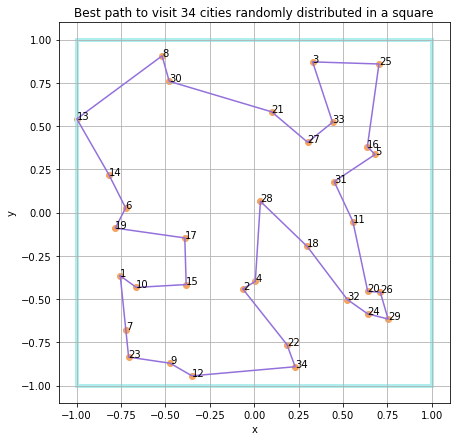

In [4]:
fig = plt.figure(1, figsize=[7, 7])
# data loading
bestPathLabel = np.loadtxt("./dataEx1/square/output_bestPath.dat", skiprows=1)
# print(bestPathLabel)
citiesL = np.loadtxt("./dataEx1/square/cities.dat", usecols = 0)
citiesX = np.loadtxt("./dataEx1/square/cities.dat", usecols = 1)
citiesY = np.loadtxt("./dataEx1/square/cities.dat", usecols = 2)
# preparing array for plotting
bestPathX = np.zeros(ncities + 1)
bestPathY = np.zeros(ncities + 1)
for ic in range(ncities):
    bestPathX[ic] = citiesX[int(bestPathLabel[ic]) - 1]
    bestPathY[ic] = citiesY[int(bestPathLabel[ic]) - 1]
bestPathX[ncities] = citiesX[0]
bestPathY[ncities] = citiesY[0]

# side 2 square
plt.gca().add_patch(Rectangle((-1.,-1.), 2., 2., edgecolor="paleturquoise", facecolor='none', lw=4))
# plot
plt.plot(bestPathX, bestPathY, color="mediumpurple")
plt.scatter(citiesX, citiesY, color="sandybrown")
for i in range(ncities):
    plt.text(citiesX[i], citiesY[i], str(i+1))
plt.title("Best path to visit " + str(ncities) + " cities randomly distributed in a square")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()